<div style="text-align: left;">
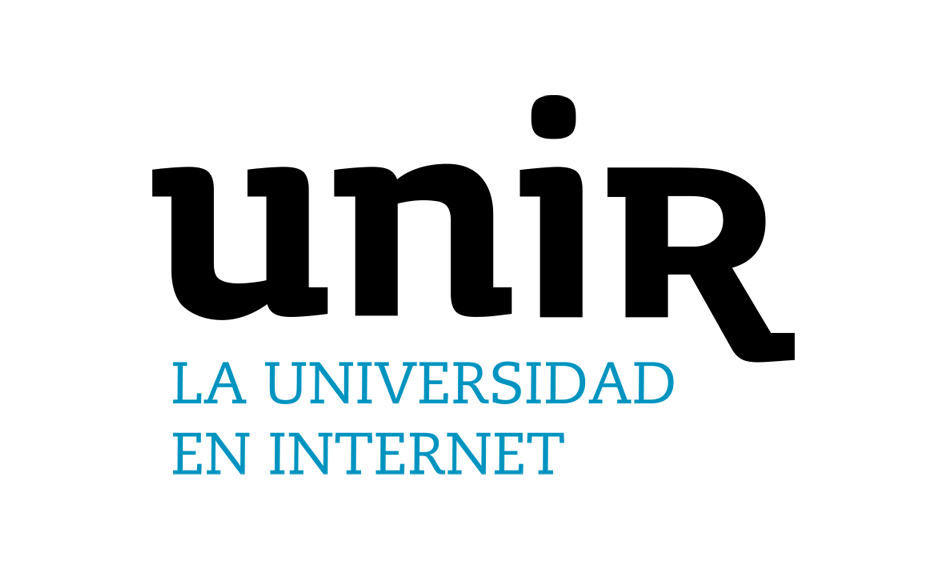
     <div>
        <h1>Tema 7: Fórmula de Black-Scholes para opciones europeas</h1>
        <p>Dr. Miguel Angel Navarro Burgos</p>
        <p>Modelización y Valoración de Derivados y Carteras en Finanzas (MIMC)</p>
    </div>
</div>

Dado un valor en un tiempo inicial ($t_0$) de la acción o subyacente $S_0$, un precio de ejercicio $K$, un tipo de interés anual libre de riesgo $r$, una volatilidad o riesgo $\sigma$ y un vencimiento $T$, las fórmulas de Black-Sholes vienen dadas por

**Para opciones de compra europeas**
\begin{equation*}
C=S_0N(d_1)-Ke^{r(T-t_0)}N(d_2),
\end{equation*}

donde $r$ es el tipo de interés libre de riesgo, $N(x)=P(Z\leq x)$ con $Z\sim N(0,1)$, $d_1$ y $d_2$ vienen dadas por:

\begin{equation*}
d_1=\frac{\ln\left(\frac{S_0}{K}\right)+\left(r+\frac{\sigma^2}{2}\right)(T-t_0) }{\sigma\sqrt{T-t_0}}\text{ y }d_2=d_1-\sigma\sqrt{T-t_0}.
\end{equation*}


**Para opciones de venta europeas**

\begin{equation*}
P=-S_0N(-d_1)+Ke^{-rT}N(-d_2).
\end{equation*}



# Estimación de parámetros

In [1]:
import numpy as np
from scipy.stats import norm


def d12(s0, t0, k, r, sigma, t):
    """
    Calcula los valores d1 y d2 usados en las fórmulas de Black-Scholes.
    
    Parámetros:
    - s0: Precio actual del activo subyacente.
    - t0: Tiempo inicial (generalmente 0 en cálculos simplificados).
    - k: Precio de ejercicio de la opción.
    - r: Tipo de interés anual libre de riesgo.
    - s: Volatilidad (sigma) del activo subyacente.
    - t: Tiempo de vencimiento de la opción.
    
    Retorna:
    - d1, d2: Valores calculados usados para determinar el precio de opciones.
    """
    # Calcula el denominador común en d1 y d2.
    aux = sigma * np.sqrt(t - t0)
    # Calcula d1 usando la fórmula de Black-Scholes.
    d1 = (np.log(s0 / k) + (r + sigma**2 / 2) * (t - t0)) / aux
    # d2 se deriva de d1 restando el denominador común.
    d2 = d1 - aux
    return d1, d2

def C(s0, k, r, t, d1, d2):
    return s0 * norm.cdf(d1) - k * np.exp(-r * t) * norm.cdf(d2)

def P(s0, k, r, t, d1, d2):
    return -s0 * norm.cdf(-d1) + k * np.exp(-r * t) * norm.cdf(-d2)

# Aplicación de la fórmula de Black Scholes

In [2]:
# Asignar los valores de los parámetros proporcionados
s0 = 74.625
k = 100
t0 = 0
t = 1.6
r = 0.05
sigma = 0.375

# Calcular d1 y d2
d1, d2 = d12(s0, t0, k, r, sigma, t)
print(f'd1 = {d1:.5f} y d2 = {d2:.5f}')

# Calcular y mostrar los precios de las opciones
print(f'C = {C(s0, k, r, t, d1, d2):.5f} y P = {P(s0, k, r, t, d1, d2):.5f}')

# Otra opción para mostrar
print(f'El precio de la opción de compra (C) es: {C(s0, k, r, t, d1, d2):.5f}')
print(f'El precio de la opción de venta (P) es: {P(s0, k, r, t, d1, d2):.5f}')

d1 = -0.21123 y d2 = -0.68557
C = 8.31636 y P = 26.00300
El precio de la opción de compra (C) es: 8.31636
El precio de la opción de venta (P) es: 26.00300


# Aproximarción de $N(x)=P(Z\leq x)$ utilizando el método de Simpson

\begin{equation*}
	N(x)=0.5+\frac{x}{6\sqrt{2\pi}}\left(e^{-\frac{x^2}{2}}+4e^{-\frac{x^2}{8}}+1\right).
\end{equation*}

In [3]:
import numpy as np

def N(x):
    return 0.5 + (x / (6 * np.sqrt(2 * np.pi))) * (np.exp(-x**2 / 2) + 4 * np.exp(-x**2 / 8) + 1)

In [4]:
from scipy.stats import norm

# Asignar los valores de los parámetros proporcionados
s0 = 74.625
k = 100
t0 = 0
t = 1.6
r = 0.05
sigma = 0.375

# Calcular d1 y d2
d1, d2 = d12(s0, t0, k, r, sigma, t)
print(f'd1 = {d1:.5f} y d2 = {d2:.5f}')

# Coparativa N(x) con aprox
print(f'N(d1) = {norm.cdf(d1):.5f}, N(d1) aprox {N(d1):.5f} y |N(d1)-aprox|={abs(norm.cdf(d1)-N(d1)):.5e}')
print(f'N(d2) = {norm.cdf(d2):.5f}, N(d2) aprox {N(d2):.5f} y |N(d2)-aprox|={abs(norm.cdf(d2)-N(d2)):.5e}')



d1 = -0.21123 y d2 = -0.68557
N(d1) = 0.41635, N(d1) aprox 0.41635 y |N(d1)-aprox|=1.69458e-07
N(d2) = 0.24649, N(d2) aprox 0.24645 y |N(d2)-aprox|=4.45898e-05


In [5]:
def C(s0, k, r, t, funcion, d1, d2):
    return s0 * funcion(d1) - k * np.exp(-r * t) * funcion(d2)

def P(s0, k, r, t, funcion, d1, d2):
    return -s0 * funcion(-d1) + k * np.exp(-r * t) * funcion(-d2)

In [6]:
from scipy.stats import norm

# Calcular y mostrar los precios de las opciones v aprox
print(f'C = {C(s0, k, r, t, norm.cdf, d1, d2):.5f}, aprox C = {C(s0, k, r, t, N, d1, d2):.5f} y |C-aprox|={abs(C(s0, k, r, t, norm.cdf, d1, d2)-C(s0, k, r, t, N, d1, d2)):.5e}')
print(f'P = {P(s0, k, r, t, norm.cdf, d1, d2):.5f}, aprox P = {P(s0, k, r, t, N, d1, d2):.5f} y |P-aprox|={abs(P(s0, k, r, t, norm.cdf, d1, d2)-P(s0, k, r, t, N, d1, d2)):.5e}')



C = 8.31636, aprox C = 8.32047 y |C-aprox|=4.10351e-03
P = 26.00300, aprox P = 26.00710 y |P-aprox|=4.10351e-03


In [7]:
import numpy as np

d = np.linspace(0, 4, 20)

for x in d:
    print(f'N({x:.3f}) = {norm.cdf(x):.5f}, N({x:.3f}) aprox {N(x):.5f} y |N({x:.3f})-aprox|={abs(norm.cdf(x) - N(x)):.5e}')
    print(f'N({-x:.3f}) = {norm.cdf(-x):.5f}, N({-x:.3f}) aprox {N(-x):.5f} y |N({-x:.3f})-aprox|={abs(norm.cdf(-x) - N(-x)):.5e}')

N(0.000) = 0.50000, N(0.000) aprox 0.50000 y |N(0.000)-aprox|=0.00000e+00
N(-0.000) = 0.50000, N(-0.000) aprox 0.50000 y |N(-0.000)-aprox|=0.00000e+00
N(0.211) = 0.58337, N(0.211) aprox 0.58337 y |N(0.211)-aprox|=1.66693e-07
N(-0.211) = 0.41663, N(-0.211) aprox 0.41663 y |N(-0.211)-aprox|=1.66693e-07
N(0.421) = 0.66314, N(0.421) aprox 0.66315 y |N(0.421)-aprox|=4.85663e-06
N(-0.421) = 0.33686, N(-0.421) aprox 0.33685 y |N(-0.421)-aprox|=4.85663e-06
N(0.632) = 0.73617, N(0.632) aprox 0.73620 y |N(0.632)-aprox|=3.12760e-05
N(-0.632) = 0.26383, N(-0.632) aprox 0.26380 y |N(-0.632)-aprox|=3.12760e-05
N(0.842) = 0.80014, N(0.842) aprox 0.80024 y |N(0.842)-aprox|=1.02304e-04
N(-0.842) = 0.19986, N(-0.842) aprox 0.19976 y |N(-0.842)-aprox|=1.02304e-04
N(1.053) = 0.85375, N(1.053) aprox 0.85396 y |N(1.053)-aprox|=2.13020e-04
N(-1.053) = 0.14625, N(-1.053) aprox 0.14604 y |N(-1.053)-aprox|=2.13020e-04
N(1.263) = 0.89673, N(1.263) aprox 0.89702 y |N(1.263)-aprox|=2.82130e-04
N(-1.263) = 0.10327,

# Gráfica

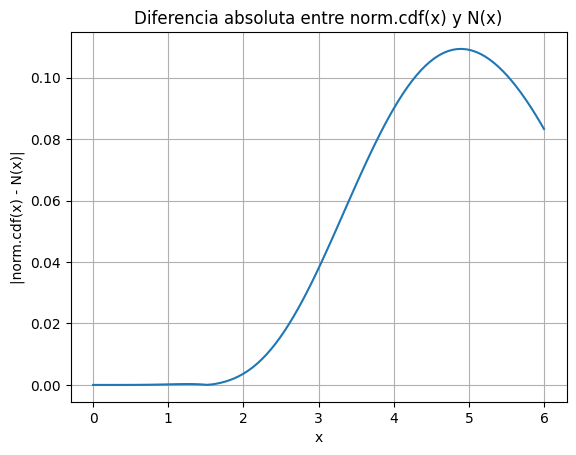

In [8]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Definición función N
def N(x):
    return 0.5 + (x / (6 * np.sqrt(2 * np.pi))) * (np.exp(-x**2 / 2) + 4 * np.exp(-x**2 / 8) + 1)

# Crear un array de valores
x = np.linspace(0, 6, 100)

# Calcular la diferencia absoluta
dif = abs(norm.cdf(x) - N(x))

# Graficar la diferencia absoluta
plt.plot(x, dif)
plt.title('Diferencia absoluta entre norm.cdf(x) y N(x)')
plt.xlabel('x')
plt.ylabel('|norm.cdf(x) - N(x)|')
plt.grid(True)
plt.show()


# Corrección error np.arange

In [9]:
import numpy as np

d = np.arange(0, 8, 0.5)

for x in d:
    print(f'N({x:.3f}) = {norm.cdf(x):.5f}, N({x:.3f}) aprox {N(x):.5f} y |N({x:.3f})-aprox|={abs(norm.cdf(x) - N(x)):.5e}')
    print(f'N({-x:.3f}) = {norm.cdf(-x):.5f}, N({-x:.3f}) aprox {N(-x):.5f} y |N({-x:.3f})-aprox|={abs(norm.cdf(-x) - N(-x)):.5e}')

N(0.000) = 0.50000, N(0.000) aprox 0.50000 y |N(0.000)-aprox|=0.00000e+00
N(-0.000) = 0.50000, N(-0.000) aprox 0.50000 y |N(-0.000)-aprox|=0.00000e+00
N(0.500) = 0.69146, N(0.500) aprox 0.69147 y |N(0.500)-aprox|=1.08783e-05
N(-0.500) = 0.30854, N(-0.500) aprox 0.30853 y |N(-0.500)-aprox|=1.08783e-05
N(1.000) = 0.84134, N(1.000) aprox 0.84153 y |N(1.000)-aprox|=1.84306e-04
N(-1.000) = 0.15866, N(-1.000) aprox 0.15847 y |N(-1.000)-aprox|=1.84306e-04
N(1.500) = 0.93319, N(1.500) aprox 0.93325 y |N(1.500)-aprox|=5.96024e-05
N(-1.500) = 0.06681, N(-1.500) aprox 0.06675 y |N(-1.500)-aprox|=5.96024e-05
N(2.000) = 0.97725, N(2.000) aprox 0.97361 y |N(2.000)-aprox|=3.64449e-03
N(-2.000) = 0.02275, N(-2.000) aprox 0.02639 y |N(-2.000)-aprox|=3.64449e-03
N(2.500) = 0.99379, N(2.500) aprox 0.97794 y |N(2.500)-aprox|=1.58458e-02
N(-2.500) = 0.00621, N(-2.500) aprox 0.02206 y |N(-2.500)-aprox|=1.58458e-02
N(3.000) = 0.99865, N(3.000) aprox 0.96072 y |N(3.000)-aprox|=3.79278e-02
N(-3.000) = 0.00135,

# Gráfica

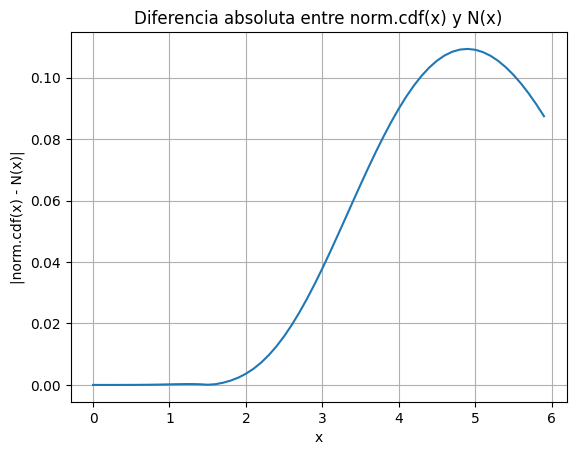

In [10]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Definición función N
def N(x):
    return 0.5 + (x / (6 * np.sqrt(2 * np.pi))) * (np.exp(-x**2 / 2) + 4 * np.exp(-x**2 / 8) + 1)

# Crear un array de valores
x = np.arange(0, 6, 0.1)

# Calcular la diferencia absoluta
dif = abs(norm.cdf(x) - N(x))

# Graficar la diferencia absoluta
plt.plot(x, dif)
plt.title('Diferencia absoluta entre norm.cdf(x) y N(x)')
plt.xlabel('x')
plt.ylabel('|norm.cdf(x) - N(x)|')
plt.grid(True)
plt.show()
